In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from pyPSFstack.pupils.sources import DipoleInterfaceSource
from pyPSFstack.pupils.windows import SEO
from pyPSFstack.core import PSFStack
from pyPSFstack.functions import trim_stack
from pyPSFstack.diversities.pola_diversities import PDiversity_QWP, \
    PDiversity_LP, PDiversity_Compound
from pyPSFstack.diversities.pupil_diversities import ZDiversity
from pyPSFstack.blurring import ExactBlurring

# Best focus due to spherical aberration

In [79]:
numerical_aperture = 1.49
magnification = 100
ni = 1.33
nf = 1.518
cam_pixel_size = 6500
distance_coverslip = [200,4000]
wavelength = 525

In [80]:
params = {}
params['pupil'] = {}
params['pupil']['aperture_size'] = numerical_aperture / nf
params['pupil']['computation_size'] = wavelength*magnification/(cam_pixel_size*nf)
params['pupil']['N_pts'] = 256*2

params['source'] = {}
params['source']['ni'] = ni
params['source']['nf'] = nf
params['source']['alpha'] = 0.

params['window'] = {}
params['window']['c'] = 1.5*np.pi#1.24*np.pi
wdw = SEO(**params['pupil'],**params['window'])
params['zdiversity'] = {}
alpha_list = [1., 1.14135, 1.19068, 1.24211, 1.34421, 1.41355, 1.69152, 2.40854]
params['zdiversity']['nf'] = nf

In [81]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])
params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

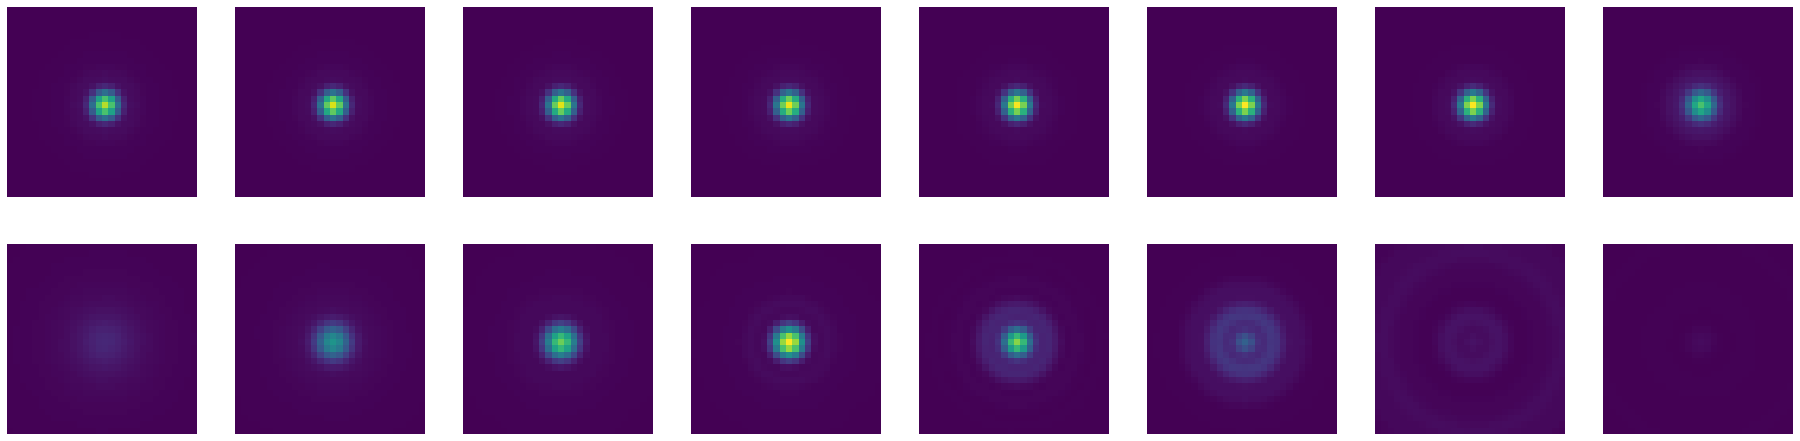

In [82]:
stack1 = trim_stack(psfs1.psf_stack, 30)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, 30)
stack2 /= np.max(stack2)
fig, ax = plt.subplots(2,8,figsize=(32,8))
for ind in range(8):
    ax[0,ind].imshow(stack1[...,ind],vmin=0,vmax=1)
    ax[0,ind].set_axis_off()
    ax[1,ind].imshow(stack2[...,ind],vmin=0,vmax=1)
    ax[1,ind].set_axis_off()

In [83]:
alpha_list

[1.0, 1.14135, 1.19068, 1.24211, 1.34421, 1.41355, 1.69152, 2.40854]

In [84]:
params['source']['delta'] = distance_coverslip[0]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src1 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv1 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs1 = PSFStack([src1,wdw], zdiversity=zdiv1)
psfs1.compute_psf_stack(orientation=[0,0,0])
params['source']['delta'] = distance_coverslip[1]/wavelength
params['zdiversity']['z_list'] = -params['source']['delta']*np.array(alpha_list)
src2 = DipoleInterfaceSource(**params['pupil'],**params['source'])
zdiv2 = ZDiversity(**params['zdiversity'], **params['pupil'])
psfs2= PSFStack([src2,wdw], zdiversity=zdiv2)
psfs2.compute_psf_stack(orientation=[0,0,0])

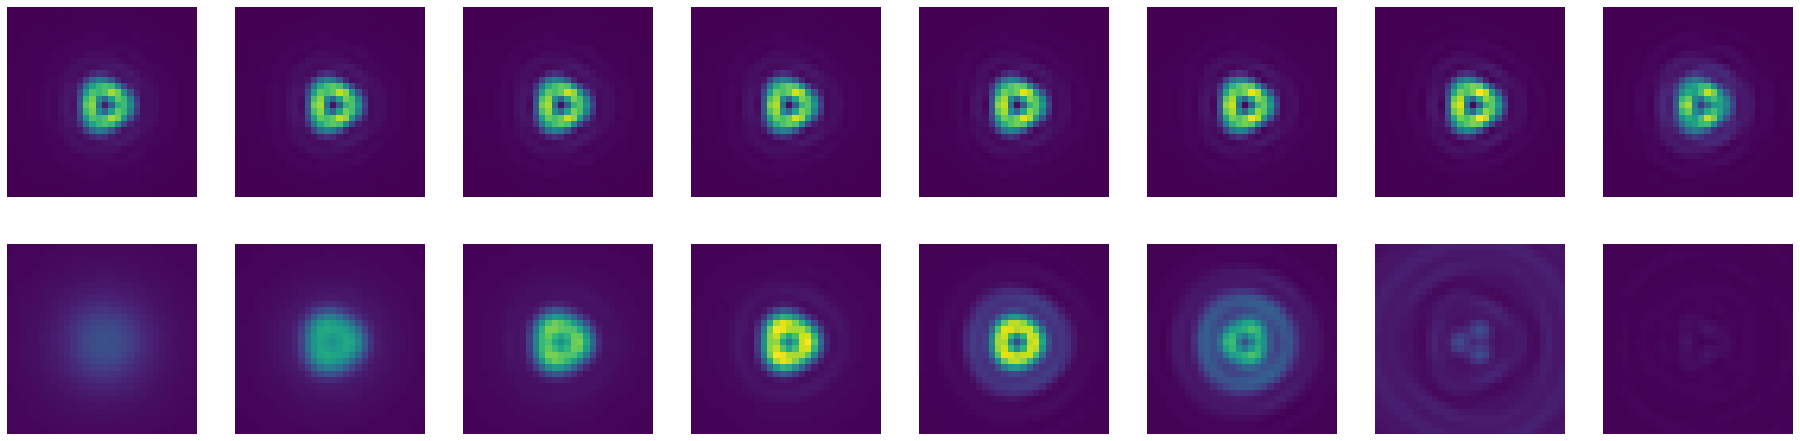

In [85]:
stack1 = trim_stack(psfs1.psf_stack, 30)
stack1 /= np.max(stack1)
stack2 = trim_stack(psfs2.psf_stack, 30)
stack2 /= np.max(stack2)
fig, ax = plt.subplots(2,8,figsize=(32,8))
for ind in range(8):
    ax[0,ind].imshow(stack1[...,ind],vmin=0,vmax=1)
    ax[0,ind].set_axis_off()
    ax[1,ind].imshow(stack2[...,ind],vmin=0,vmax=1)
    ax[1,ind].set_axis_off()